# Basic operations to optimize a Birch-Murnaghan EoS 
## from *static energies* and vibrational frequencies, at different cell volumes, computed at the *ab initio* level 


This tutorial shows the basic usage of the BMx system to optimize the EoS of a mineral (*pyrope*, in the example) starting from a set of values of *static energy*, at different volumes ($V$), and *frequencies of vibrational normal modes* also computed at different values of the unit cell volume of the crystal.

The calculation is done within the framework of the *Quasi-Harmonic Approximation* (**QHA**).

## A bit of theory

The *Helmholtz free energy* $F$, as a function of $V$ and $T$ (*temperature*), is computed following its definition in statistical termodynamics:

$$F=U-TS = -k_BT \log Z$$

where $U$ is the internal energy, $S$ the entropy, $Z$ the *partition function* and $k_B$ the Boltzmann's constant. In turn, $Z$ is defined as:

$$Z = \sum_a e^{-\epsilon_a/k_BT}$$

where $\epsilon_a$ is the energy of the $^{th}a$ *state* of the crystal and the *sum* is extended to all the possible *states*. In particular, at a fixed volume, the contribution of the $^{th}i$ normal mode with frequency $\nu_i$ to the *vibrational* Helmholtz free energy ($F^{vib}_{i}$) is given by

$$F^{vib}_{i} = -k_BT\sum_n e^{-(n+1/2)h\nu_i/k_BT}$$

where $n$ is the vibrational quantum number of the oscillator. The total *vibrational free energy* is:

$$F^{vib}=\sum_i F^{vib}_{i}$$

where the sum is extended to all the normal modes of the crystal. Note that: 

$$F = F^{static} + F^{vib} = U^{static} + U^{vib} - TS^{vib}$$

where $U^{static}$ is the so named *static energy* of the crystal ($U^{static}\equiv F^{static}$) that depends on the volume of the cell only. 

***Pressure*** ($P$) at a given volume an temperature is evaluated from its definition in term of free energy:

$$P=-\left(\frac{\partial F}{\partial V}\right)_T = -\left(\frac{\partial U^{static}}{\partial V}\right)_T  -\left(\frac{\partial F^{vib}}{\partial V}\right)_T = P^{static}(V) + P^{vib}(V,T)$$

The *vibrational pressure* $P^{vib}$ is here defined as the partial derivative of $F^{vib}$ with respect to $V$ (at $T$ constant). In turn, $F^{vib}$ depends upon $V$ through the variation of the $\nu_i$'s by $V$; in a perfectly *harmonic* crystal, the vibrational frequencies are by definition independent of volume, so that the *vibrational pressure* is exactly *zero* and the total pressure is given by the static contribution only. This is the *harmonic* model. 

The *harmonic* model is usually *not* valid as the frequencies normally do depend of volume. The *Quasi harmonic approximation* (**QHA**) is thus generally used. In fact, to compute the *vibrational pressure*, the frequencies variation with the unit cell volume must be estimated, so that $F$ and its derivatives with $V$ can be computed at whatever temperature. 

Static energies and frequencies (at different volumes) must be calculated with some quantum-mechanical program; the one that was used here, in the case of pyrope, is [CRYSTAL17]( http://www.crystal.unito.it/index.php).

A possible strategy to get the parameters of a chosen equation of state (EoS) is to calculate the pressure of the crystal (first derivative of $F$ with respect to $V$) in a range of volumes, at a fixed temperature. The EoS is then fitted to the pressure/volume set thus obtained. 

The strategy followed in the current project if to directly fit the *volume-integrated* EoS to the $F$ free energy/volume set. In fact, by defining with $P_{EoS}(V)$ the $P(V)$ EoS function (for instance, a Birch-Murnaghan equation), its volume integrated form follows by:

$$P_{EoS}(V)=-\left(\frac{\partial F_{EoS}}{\partial V}\right)_T \ \rightarrow \ {\rm d}F_{EoS}(V)=-P_{EoS}(V){\rm d}V \ 
\rightarrow \ F_{EoS}(V) = -\int_{V_0}^{V} P_{EoS}(V){\rm d}V + F_{EoS}(V_0)$$

where $F_{EoS}(V_0)$ is the free energy at the equilibrium volume (at the fixed temperature). 




## *Practice*

1. Prepare a folder containing;
   * a file of primitive unit cell volumes (in $\mathrm A^3$) and the corresponding energy values ($U^{static}$ in *a.u.*; see the *theoretical* section above). In the example provided, such file is 'pyrope_static.dat': the first column lists volumes; the second one lists energies;
   * a file of volumes at which frequencies of vibrational modes are computed. In the example provided, such files is 'volume.dat';
   * a file of set of frequencies computed at each volume listed in the *volume* file. Such file is named 'pyrope_freq.dat' in the example. Each column of the file lists the frequencies of all the modes computed at a given volume. **Note** that the first column lists the *degeneracy* of the modes. Frequency values are in $\rm{cm}^{-1}$;
   * an *input.txt* file with instructions to run the program. Have a look at the input file provided in the example, with the comments it contains about the meaning of each keyword.
   
   
2. For a *quick start*, in the master folder (the one with the program code) do provide a file *quick_start.txt* just containing the name of the data folder (*pyrope* in the example).   

Start the calculation by running the ***bm3_thermal_2*** Python code:

In [1]:
%run bm3_thermal_2.py

This is BMx-QM program, version 2.4.0 - 18/02/2021 
Run time:  2021-05-23 18:15:28.902582

File quick_start.txt found in the master folder
Input files in 'pyrope' folder

Input file

STATIC
pyrope_static.dat
VOLUME
volume.dat
FREQ
pyrope_freq_2.dat
EXP
experimental.txt
LO
LO.txt
FITVOL
SPLINE
725. 773. 12 3 2.
FU
4 20
SET
0 1 4 5 8 10 15 21
TEMP
300
CP
0.  2. -2. 1. -1. -0.5 3. -3
ALPHA
0. -2  -1 -0.5
KIEFFER
100. 100. 100.
END

-------- End of input file -------

Frequencies corrected for LO-TO splitting

Static BM3 EoS

Bulk Modulus: 173.95 (0.07) GPa
Kp:             4.30 (0.04)
V0:           756.1932 (0.00) A^3
E0:            -1.14182286e+04 (1.56e-06) hartree


Kieffer model for the acoustic branches activated


The parameters of a BM3 EoS fitted to the *static* data (*no vibrational contributions* considered) are printed. 

Next, issue the command ***eos_temp*** by giving a *temperature* (n K) as argument. This provides the BM3 EoS parameters at the specific temperature.


 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 160.14   (0.11) GPa
Kp:             4.66   (0.03)
V0:           767.6419 (0.005) A^3

Fix status: False
Fit of frequencies is active
Spline fit: degree  3, smooth: 2.0
Volume range: 725.00 - 773.00, points=12


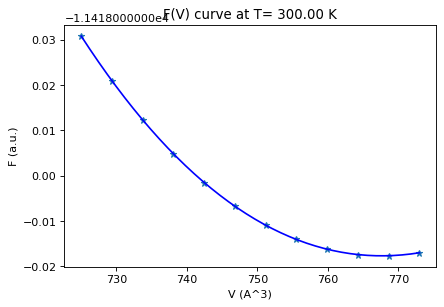


Volume-Pressure list at 300.00 K

 725.000   10.46
 729.364    9.23
 733.727    8.04
 738.091    6.89
 742.455    5.77
 746.818    4.70
 751.182    3.65
 755.545    2.64
 759.909    1.66
 764.273    0.71
 768.636   -0.21
 773.000   -1.10


In [2]:
eos_temp(300)

Besides other points, the output provides information concerning the method followed to deal with the frequencies change with the volume: in the present case, spline fits of $\nu_i(V)$ are performed for each mode $i$, as specified by the *SPLINE* keyword under the *FITVOL* directive in the *input.txt* file.

To deactivate the fitting of the frequencies, so to compute the EoS by using just the set of frequencies provided in input, at the corresponding volumes, use the command ***fit_off*** 

In [3]:
fit_off()
eos_temp(300,prt=False)


 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 160.00   (1.56) GPa
Kp:             4.70   (0.40)
V0:           767.6477 (0.066) A^3

Fix status: False
Fitting is off




**Note** the *standard deviations* on each parameter, as determined by the fit, which are higher than those obtained before, with the spline fit of the frequencies. 

Beside *spline* fittings of the frequencies, *polynomial* fits can be used by issuing the command ***set_poly*** which accepts the degree of the polynomial as argument. Look at the example below, where the effect of the degree of the polynomial on the computed EoS parameters is evaluated:   

Volume range 725.5483 - 772.8196 defined for 'POLY' fit

 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 158.77   (0.14) GPa
Kp:             4.99   (0.03)
V0:           767.6984 (0.008) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  2
Volume range: 725.00 - 769.00, points=16



 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 163.17   (0.00) GPa
Kp:             4.11   (0.00)
V0:           767.4477 (0.000) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  3
Volume range: 725.00 - 769.00, points=16



 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 159.49   (1.63) GPa
Kp:             4.78   (0.36)
V0:           767.6911 (0.085) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  4
Volume range: 725.00 - 769.00, points=16


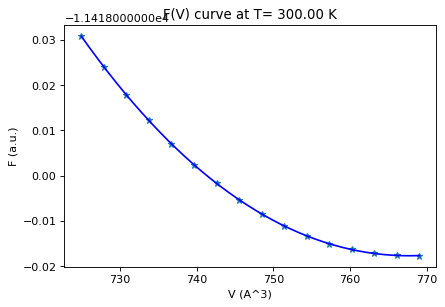


Volume-Pressure list at 300.00 K

 725.000   10.47
 727.933    9.63
 730.867    8.82
 733.800    8.02
 736.733    7.24
 739.667    6.48
 742.600    5.74
 745.533    5.01
 748.467    4.30
 751.400    3.60
 754.333    2.92
 757.267    2.25
 760.200    1.60
 763.133    0.96
 766.067    0.34
 769.000   -0.27


In [4]:
set_poly(2)
set_volume_range(725,769,16)
eos_temp(300,prt=False)
set_poly(3)
eos_temp(300,prt=False)
set_poly(4)
eos_temp(300,prt=True)

The volume range for the fitting of frequencies and EoS can be changed by the function ***set_volume_range***. The function takes, as arguments, the minimum volume (v_min), the maximum volume (v_max) and the number of points in the range:

All global flags set to False; flag list:

disp.flag
disp.input
kieffer.flag
kieffer.input
anharm.flag
lo.flag
flag_spline.flag
flag_poly.flag
f_fix.flag
verbose.flag
bm4.flag
disp.eos_flag
disp.fit_vt_flag
static_range.flag
vd.flag


Input file

STATIC
pyrope_static.dat
VOLUME
volume.dat
FREQ
pyrope_freq_2.dat
EXP
experimental.txt
LO
LO.txt
FITVOL
SPLINE
725. 773. 12 3 2.
FU
4 20
SET
0 1 4 5 8 10 15 21
TEMP
300
CP
0.  2. -2. 1. -1. -0.5 3. -3
ALPHA
0. -2  -1 -0.5
KIEFFER
100. 100. 100.
END

-------- End of input file -------

Frequencies corrected for LO-TO splitting

Static BM3 EoS

Bulk Modulus: 173.95 (0.07) GPa
Kp:             4.30 (0.04)
V0:           756.1932 (0.00) A^3
E0:            -1.14182286e+04 (1.56e-06) hartree



 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 163.16   (0.00) GPa
Kp:             4.11   (0.00)
V0:           767.4478 (0.000) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  3
Volume range: 725.00 - 768.00, point

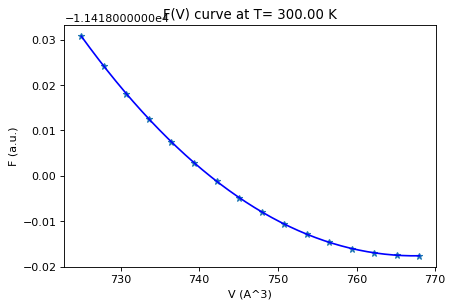


Volume-Pressure list at 300.00 K

 725.000   10.44
 727.867    9.63
 730.733    8.85
 733.600    8.08
 736.467    7.32
 739.333    6.58
 742.200    5.85
 745.067    5.13
 747.933    4.43
 750.800    3.74
 753.667    3.07
 756.533    2.41
 759.400    1.76
 762.267    1.12
 765.133    0.50
 768.000   -0.12


In [5]:
reload_input("pyrope")
set_poly(3)
set_volume_range(725,768,16)
eos_temp(300)

**Note** that the *set_volume_range* function has no effect with *fit_off*. To change the volume range if the frequencies are not fitted, just use the SET keyword in *input.txt*.

EoS optimization can be performed by **keeping *Kp* fixed**. Use of the ***set_fix*** function can be used for the purpose: 

In [6]:
set_fix(4.00)
set_poly(4)
eos_temp(300,prt=False)


 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 163.36   (0.31) GPa
Kp:             4.00   (0.00)
V0:           767.4769 (0.040) A^3

Fix status: True
Kp fixed at 4.00
Fit of frequencies is active
Polynomial fit: degree  4
Volume range: 725.00 - 768.00, points=16




The EoS can also be evaluated by fitting the BM3 equation to the pressures computed for a set of volumes (at a given temperature). In turn, such pressures are calculated as the volume derivative of the $F(V,T)$ Helmholtz free energy:

$$P=-\left(\frac{\partial F}{\partial V}\right)_T$$

At each volume, the static energy contribution to $F$ comes from a V-BM3 fit to the static energy values $[U^{static}(V)]$, whereas all the vibrational contributions comes from the *vibrational partition function*. 

Setup the calculation by specifying a volume range for the frequency fit (and optionally check the EoS evaluated by the methods outlined above): 

In [7]:
set_volume_range(725,768,20)
reset_fix()
eos_temp(300,prt=False)


 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 160.83   (1.08) GPa
Kp:             4.55   (0.23)
V0:           767.5990 (0.063) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  4
Volume range: 725.00 - 768.00, points=20




Then compute the EoS by fitting a BM3 function to the $P(V)$ data; the command to use is ***bulk_dir*** (which wants the temperature as argument):


BM3 EoS from P(V) fit

K0:    157.08   (1.81) GPa
Kp:      4.99   (0.39)    
V0:  767.9319   (0.10) A^3


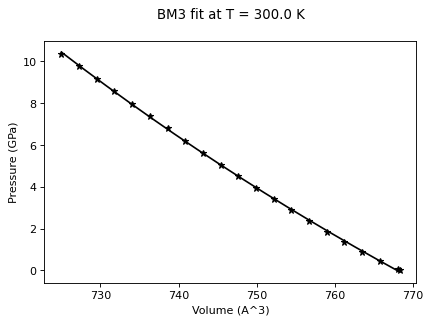

In [8]:
bulk_dir(300)

### 4^ order Birch-Murnaghan EoS

To fit the *F(V)* curve by a volume integrated 4^ order Birch-Murnaghan EoS, just issue the commands *start_bm4()* and *eos_temp*:

All global flags set to False; flag list:

disp.flag
disp.input
kieffer.flag
kieffer.input
anharm.flag
lo.flag
flag_spline.flag
flag_poly.flag
f_fix.flag
verbose.flag
bm4.flag
disp.eos_flag
disp.fit_vt_flag
static_range.flag
vd.flag


Input file

STATIC
pyrope_static.dat
VOLUME
volume.dat
FREQ
pyrope_freq_2.dat
EXP
experimental.txt
LO
LO.txt
FITVOL
SPLINE
725. 773. 12 3 2.
FU
4 20
SET
0 1 4 5 8 10 15 21
TEMP
300
CP
0.  2. -2. 1. -1. -0.5 3. -3
ALPHA
0. -2  -1 -0.5
KIEFFER
100. 100. 100.
END

-------- End of input file -------

Frequencies corrected for LO-TO splitting

Static BM3 EoS

Bulk Modulus: 173.95 (0.07) GPa
Kp:             4.30 (0.04)
V0:           756.1932 (0.00) A^3
E0:            -1.14182286e+04 (1.56e-06) hartree



BM4-EoS initial estimate:

V0:  756.1932
K0:  173.95
Kp:    4.30
Kpp:  -0.02
E0:   -1.141823e+04

Static BM4-EoS

Bulk Modulus:  173.93 GPa
Kp:              4.25 
Kpp:            -0.02 
V0:            756.1957 A^3




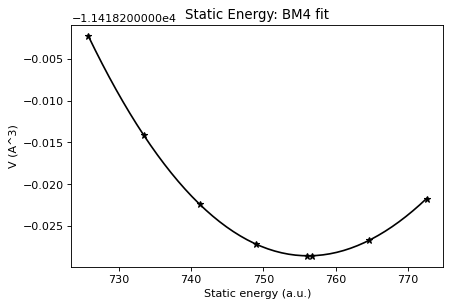


 ** BM4 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 163.32   (0.00) GPa
Kp:             4.01   (0.00)
Kpp            -0.04   (0.00)
V0:           767.4466 (0.000) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  3
Volume range: 725.00 - 768.00, points=16


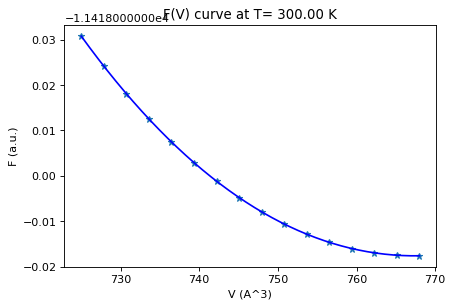


Volume-Pressure list at 300.00 K

 725.000   10.40
 727.867    9.60
 730.733    8.82
 733.600    8.06
 736.467    7.30
 739.333    6.56
 742.200    5.84
 745.067    5.13
 747.933    4.43
 750.800    3.74
 753.667    3.07
 756.533    2.41
 759.400    1.76
 762.267    1.12
 765.133    0.50
 768.000   -0.12


In [9]:
reload_input("pyrope")
set_poly(3)
start_bm4()
eos_temp(300)

Let's see the effect of a change in the volume range on a BM4 fit:

In [10]:
set_volume_range(725,770,16)
eos_temp(300,prt=False)


 ** BM4 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 163.32   (0.00) GPa
Kp:             4.01   (0.00)
Kpp            -0.07   (0.00)
V0:           767.4466 (0.000) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  3
Volume range: 725.00 - 770.00, points=16




As in the case of BM3, also the BM4 EoS can be computed fitting P(V) instead of F(V) data. The function ***bm4_dir*** is to be used for the purpose: 


BM4-EoS initial estimate:

V0:  756.1932
K0:  173.95
Kp:    4.30
Kpp:  -0.02
E0:   -1.141823e+04

Static BM4-EoS

Bulk Modulus:  173.93 GPa
Kp:              4.25 
Kpp:            -0.02 
V0:            756.1957 A^3




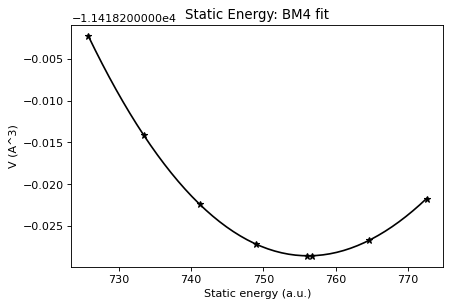

Fix status: False

BM4 EoS from P(V) fit

K0:    163.18   (0.01) GPa
Kp:      4.10   (0.00)    
Kpp:    -0.02   (0.00)    
V0:  767.4477   (0.00) A^3


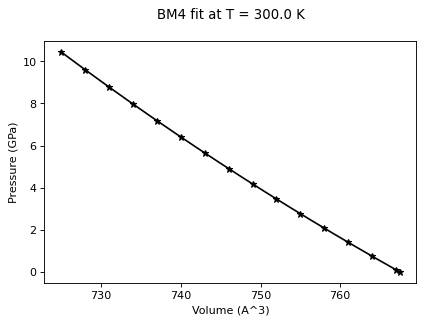


Volume-Pressure list at 300.00 K

 725.000   10.44
 728.000    9.60
 731.000    8.77
 734.000    7.97
 737.000    7.18
 740.000    6.40
 743.000    5.65
 746.000    4.90
 749.000    4.17
 752.000    3.46
 755.000    2.76
 758.000    2.07
 761.000    1.40
 764.000    0.74
 767.000    0.10
 767.449   -0.00


In [11]:
bm4_dir(300)

Some information concerning volume ranges and fitting conditions can be gathered through the method ***info.show()***:

In [12]:
bm4.off()
set_volume_range(725, 772)
eos_temp(300,prt=False)
info.show()


 ** BM3 fit **

EoS at the temperature of 300.00 K

Bulk Modulus: 163.16   (0.00) GPa
Kp:             4.11   (0.00)
V0:           767.4482 (0.000) A^3

Fix status: False
Fit of frequencies is active
Polynomial fit: degree  3
Volume range: 725.00 - 772.00, points=16



Current settings and results

Static data            ** min, max volumes: 725.7483, 772.6196; points: 8
Frequency volume range ** min, max volumes: 725.7483, 772.6196; points: 22
Selected freq. sets    ** min, max volumes: 725.7483, 772.6196; points: 8
Frequency sets:           [0, 1, 4, 5, 8, 10, 15, 21]

Fit of frequencies     ** type: poly, degree: 3
                          min, max volumes: 725.0000, 772.0000; points 16

** Static EoS (BM3) **
K0: 173.95 GPa, Kp: 4.30, V0: 756.1932 A^3

** BM3 EoS from the last computation, at the temperature of 300.00 K **
K0: 163.16 GPa, Kp: 4.11, V0: 767.4482 A^3
Kp not fixed

No zone center excluded modes
No off center excluded modes

Kieffer model on; frequencies 100.00 100.00

### Direct calculation of the bulk modulus

Bulk modulus can also be computed from its definition

$$K=-V\left(\frac{\partial P}{\partial V}\right)_T$$

This is done by the function *bulk_modulus_p* in two different ways:

1. a V-EoS is fitted to the $F(V)$ data at a fixed temperature; pressures at any given volume are computed from the fitted EoS and $K$ is computed as the derivative of *P* with respect to *V*;


2. pressures are computed as derivatives of the *F* function, at a fixed temperature, and $K$ is obtained as the derivative of *P* with respect to *V*.

At variance with the first case, no reference to any EoS function is present in the second route.

Reload the input and start the calculation:

In [13]:
reload_input('pyrope')
set_poly(3)

All global flags set to False; flag list:

disp.flag
disp.input
kieffer.flag
kieffer.input
anharm.flag
lo.flag
flag_spline.flag
flag_poly.flag
f_fix.flag
verbose.flag
bm4.flag
disp.eos_flag
disp.fit_vt_flag
static_range.flag
vd.flag


Input file

STATIC
pyrope_static.dat
VOLUME
volume.dat
FREQ
pyrope_freq_2.dat
EXP
experimental.txt
LO
LO.txt
FITVOL
SPLINE
725. 773. 12 3 2.
FU
4 20
SET
0 1 4 5 8 10 15 21
TEMP
300
CP
0.  2. -2. 1. -1. -0.5 3. -3
ALPHA
0. -2  -1 -0.5
KIEFFER
100. 100. 100.
END

-------- End of input file -------

Frequencies corrected for LO-TO splitting

Static BM3 EoS

Bulk Modulus: 173.95 (0.07) GPa
Kp:             4.30 (0.04)
V0:           756.1932 (0.00) A^3
E0:            -1.14182286e+04 (1.56e-06) hartree




The route (1) explained above is followed by specifying the keyword **noeos=False** as argument of the function *bulk_modulus_p*  (that is the default). The function requires the temperature (300K in the example) and the pressure (0 GPa in the example) as mandatory arguments:   

In [14]:
bulk_modulus_p(300,0,noeos=False,prt=True)

Bulk Modulus at T = 300.0 K and P = 0.0 GPa, noeos = False: 162.637 GPa, V = 767.448 


The second route is the choice when the keyword **noeos=True**:

In [15]:
bulk_modulus_p(300,0, noeos=True, prt=True)

Bulk Modulus at T = 300.0 K and P = 0.0 GPa, noeos = True: 163.110 GPa, V = 767.449 


### Note on numerical derivatives with respect to *V*

As said above, in a function like *bulk_modulus_p*, pressures are evaluated through numerical derivatives of *F* with respect to *V* (if noeos=True) and, likewise, the same type of numerical derivatives are employed to compute *K*. The computation of numerical derivatives involves a volume range at which the given $f(V)$ is computed, then it is fit by some polynomials of $V$ and, finally, that polynomials is analytically derived. The file *parame.py* contains some convenient parameters to perform such a task. For instance, the power of the polynomials is set to 3 (*degree_v* value, imported in the program at runtime and stored in the *pr.degree_v* variable). The V-range (*pr.delta_v* variable) is also imported as a default value but it is usually recomputed by the program as a function of the equilibrium static volume (*v0*) of the crystal being investigated. To do that, the parameter *pr.v_frac* is used (default value: 0.0015); precisely: *delta=v0\*pr.v_frac*.

The class *volume_delta_class* (whose instance is *vd*) is provided to redefine *delta*, as well as *v_frac* and *v0*, or to set *delta* to the default *pr.delta_v* value. As an example:

In [16]:
print("Flag: %r, v0: %6.3f, frac: %6.4f, delta: %5.3f" % (vd.flag, vd.v0, vd.frac, vd.delta))
bulk_modulus_p(300,0,noeos=False,prt=True)

Flag: True, v0: 756.193, frac: 0.0015, delta: 1.134
Bulk Modulus at T = 300.0 K and P = 0.0 GPa, noeos = False: 162.637 GPa, V = 767.448 


To use the default V-range, simply invoke the *vd.off* method:

In [17]:
vd.off()
print("Default delta value: %6.3f" % pr.delta_v)
bulk_modulus_p(300,0,noeos=False,prt=True)

Default delta value:  0.500
Bulk Modulus at T = 300.0 K and P = 0.0 GPa, noeos = False: 164.776 GPa, V = 767.448 


In this case, a significant difference (about 2GPa) between the two computed $K$ values is observed.

### Bulk modulus as a function of temperature 

To compute the bulk modulus in a range of temperatures, the function *bulk_modulus_p_serie* can be used; its many arguments can be seen by requesting the help:

In [18]:
help(bulk_modulus_p_serie)

Help on function bulk_modulus_p_serie in module __main__:

bulk_modulus_p_serie(tini, tfin, nt, pres, noeos=False, fit=False, type='poly', deg=2, smooth=5, out=False, **kwargs)
    Computes the bulk modulus from the definition K=-V(dP/dV)_T in a range
    of temperature values
    
    Args:
        tini:   lower temperature in the range
        tfin:   higher temperature in the range
        nt:     number of points in the [tini, tfin] range
        pres:   pressure (GPa)
        noeos:  see note below
        fit:    if True, a fit of the computed K(T) values is performed
        type:   type of the fit ('poly', or 'spline')
        deg:    degree of the fit
        smooth: smooth parameter for the fit; relevant if type='spline'
        out:    if True, the parameters of the K(T) and V(T) fits are printed
        
    Keyword Args:
        fix:    if fix is provided, Kp is kept fixed at the fix value
                Relevant if noeos=False
                
    Note:
        if noeos=

Volume: 772.1726
Fit of frequencies is active
Polynomial fit: degree  3
Volume range: 725.00 - 772.00, points=16



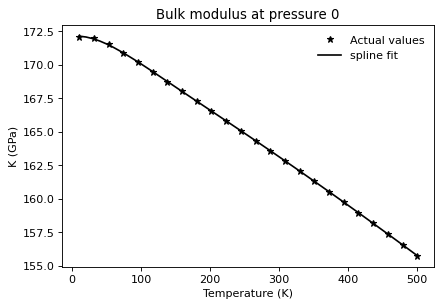

In [19]:
vd.on()
bulk_modulus_p_serie(10, 500., 24, 0, noeos=True, fit=True, type='spline', deg=3, smooth=0.01)

### Interface to EoSFit

The function ***eosfit_dir*** can be used to write a PVT file to be used as input to the [EoSFit](http://www.rossangel.com/text_eosfit.htm). Such function computes the pressure, at each volume and pressure, as the derivative of the $F$ function with respect to $V$ (at constant $T$).

The function ***eosdir*** can also be used as an interface to EoSFit: it computes the pressure by using a BM3 EoS that was determined by fitting a volume-integrated BM3 EoS to $F(V)$ points. 

The set of temperatures at which P(V) data must be computed is specified in *input.txt*, under the kewyword TEMP. 

In [20]:
eosfit_dir("pyrope_eosfit_dir.dat")


EoSFit file pyrope/pyrope_eosfit_dir.dat saved
